Adam (short for **Adaptive Moment Estimation**) is an optimization algorithm commonly used in training machine learning models, particularly deep learning neural networks. It combines the advantages of two other popular optimization techniques: AdaGrad and RMSProp.



# Key Features of Adam Optimizer (Advantage):

**Adaptive Learning Rates:** Adam adjusts the learning rates for each parameter individually based on their gradients' moments (average and variance). This helps the optimizer adapt more effectively to the changing dynamics of the training process.

**Combines Momentum and RMSProp: **Adam incorporates the concept of momentum (similar to the momentum optimizer) and the adaptive learning rate (similar to RMSProp), providing faster convergence and better handling of sparse gradients.

**Bias Correction:** Adam includes mechanisms to correct biases in the first and second moments, especially at the start of training. This ensures more accurate parameter updates.

**Fast convergence:** It often finds the minimum faster than traditional methods.

# What does ADAM do:

ADAM adjusts the weights of a neural network during training to minimize the error (loss) in predictions. It decides how much to change each weight based on the gradient (which tells the direction of change) and some clever adjustments to speed up learning.

# Why ADAM:

ADAM combines the benefits of **two** earlier methods:

**Momentum:** It smoothens the updates by considering past gradients. This helps avoid noisy or erratic changes in weights.

**RMSprop:** It adapts the learning rate for each parameter based on how frequently that parameter changes. This ensures that large updates don't overshoot the optimal point, and small updates aren't ignored.

# How does ADAM work?

Step 1: It calculates the gradient of the loss with respect to the weights (just like other optimizers).

Step 2: It keeps track of two moving averages:

𝑚(t): The mean of gradients (like momentum).

v(t): The squared mean of gradients (for adaptive scaling).

Step 3: It adjusts these moving averages to reduce bias (a trick called bias correction).

Step 4: It updates the weights using the adjusted averages.

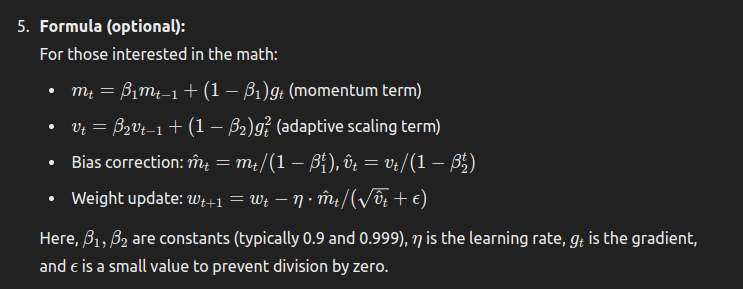

# Training with ADAM optimizer

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Generate some dummy data
np.random.seed(42)
X = np.random.rand(1000, 2)  # 1000 samples with 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Simple binary classification target

# Split into training and testing sets
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

# Build a simple model
model = Sequential([
    Dense(8, activation='relu', input_shape=(2,)),  # Hidden layer with 8 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model using Adam optimizer
adam_optimizer = Adam(learning_rate=0.01)  # You can adjust the learning rate
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3760 - loss: 0.7272 - val_accuracy: 0.5350 - val_loss: 0.6802
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5479 - loss: 0.6751 - val_accuracy: 0.6800 - val_loss: 0.6524
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7051 - loss: 0.6439 - val_accuracy: 0.7900 - val_loss: 0.5927
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7914 - loss: 0.5793 - val_accuracy: 0.9000 - val_loss: 0.5081
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8731 - loss: 0.4948 - val_accuracy: 0.9600 - val_loss: 0.4131
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9383 - loss: 0.3940 - val_accuracy: 0.9650 - val_loss: 0.3254
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9477 - loss: 0.3270 - val_accuracy: 0.9700 - val_loss: 0.2721
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9763 - loss: 0.2732 - val_accuracy: 0.9900 - val_loss

**Data**: We generate dummy data for a simple binary classification task.

**Model**: A small feedforward neural network with one hidden layer and a sigmoid activation for binary output.

**Adam Optimizer**: We use Adam with a learning rate of 0.01 (can be adjusted based on your problem).

**Training**: The model is trained using binary cross-entropy as the loss function.

**Evaluation**: The model's performance is evaluated on a test dataset.